In [0]:
import pandas as pd
import numpy as np
import lightgbm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve,auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from sklearn.svm import LinearSVC



In [0]:
from google.colab import drive 
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [0]:
higgs_atlas_data = pd.read_csv('/drive/My Drive/Colab/atlas_data.csv')
higgs_atlas_data.head()


,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.000814,s,t,0.002653
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,0.681042,b,t,2.233584
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,0.715742,b,t,2.347389
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,1.660654,b,t,5.446378
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.904263,b,t,6.245333


In [0]:
# higgs_atlas_data['Event_Probablity']=higgs_atlas_data.EventId * higgs_atlas_data.Weight

In [0]:
# sns.pairplot(data=higgs_atlas_data)

In [0]:
higgs_atlas_data.loc[higgs_atlas_data['Label']=='s']

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight
0,100000,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.200,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497,0.000814,s,t,0.002653
6,100006,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,305.967,3.371,1.393,0.791,28.850,1.113,2.409,97.240,0.675,-0.966,38.421,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877,0.000814,s,t,0.002653
7,100007,154.916,10.418,94.714,29.169,-999.000,-999.000,-999.000,2.897,1.526,138.178,0.365,-1.305,-999.000,78.800,0.654,1.547,28.740,0.506,-1.347,22.275,-1.761,187.299,1,30.638,-0.715,-1.724,-999.000,-999.000,-999.000,30.638,0.005721,s,t,0.018636
9,100009,128.053,88.941,69.272,193.392,-999.000,-999.000,-999.000,1.609,28.859,255.123,0.599,0.538,-999.000,54.646,-1.533,0.416,32.742,-0.317,-0.636,132.678,0.845,294.741,1,167.735,-2.767,-2.514,-999.000,-999.000,-999.000,167.735,0.000461,s,t,0.001502
15,100015,111.026,32.096,75.271,23.067,-999.000,-999.000,-999.000,3.205,23.067,69.649,1.276,-1.414,-999.000,30.606,-1.107,-1.903,39.043,-1.944,1.191,19.959,2.415,122.176,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,0.005721,s,t,0.018636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818226,918226,140.804,24.712,98.037,29.817,-999.000,-999.000,-999.000,2.907,21.578,131.994,0.809,1.411,-999.000,51.599,0.575,1.132,41.741,1.313,-2.339,15.377,2.925,142.772,1,38.654,-0.153,-0.147,-999.000,-999.000,-999.000,38.654,0.005721,s,u,0.259892
818227,918227,96.816,19.198,45.972,240.285,-999.000,-999.000,-999.000,1.130,30.000,298.031,2.565,1.375,-999.000,24.611,-0.356,-0.334,63.120,-1.361,-0.851,154.968,-0.657,379.024,1,210.299,-1.438,2.462,-999.000,-999.000,-999.000,210.299,0.005721,s,u,0.259892
818229,918229,161.338,82.848,101.681,76.665,2.882,273.808,-0.343,3.075,18.813,230.771,0.548,-1.335,0.690,60.597,1.487,-1.797,33.188,0.439,1.094,52.338,-2.268,304.659,2,99.110,2.758,1.131,37.876,-0.124,-1.672,136.986,0.000461,s,u,0.020956
818233,918233,105.668,46.443,60.048,156.191,0.403,47.746,0.936,1.279,6.133,256.853,0.659,1.343,0.000,61.970,2.074,1.874,40.827,2.098,-3.131,72.892,2.273,303.668,2,112.264,1.190,-0.766,41.791,0.787,-1.090,154.056,0.005721,s,u,0.259892


In [0]:
higgs_atlas_data.loc[higgs_atlas_data['KaggleSet']=='t'].shape

(250000, 35)

In [0]:
higgs_atlas_data.loc[higgs_atlas_data['KaggleSet']=='v'].shape

(450000, 35)

In [0]:
higgs_atlas_data.loc[higgs_atlas_data['KaggleSet']=='b'].shape

(100000, 35)

In [0]:
higgs_atlas_data.loc[higgs_atlas_data['KaggleSet']=='u'].shape

(18238, 35)

In [0]:
higgs_atlas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818238 entries, 0 to 818237
Data columns (total 35 columns):
EventId                        818238 non-null int64
DER_mass_MMC                   818238 non-null float64
DER_mass_transverse_met_lep    818238 non-null float64
DER_mass_vis                   818238 non-null float64
DER_pt_h                       818238 non-null float64
DER_deltaeta_jet_jet           818238 non-null float64
DER_mass_jet_jet               818238 non-null float64
DER_prodeta_jet_jet            818238 non-null float64
DER_deltar_tau_lep             818238 non-null float64
DER_pt_tot                     818238 non-null float64
DER_sum_pt                     818238 non-null float64
DER_pt_ratio_lep_tau           818238 non-null float64
DER_met_phi_centrality         818238 non-null float64
DER_lep_eta_centrality         818238 non-null float64
PRI_tau_pt                     818238 non-null float64
PRI_tau_eta                    818238 non-null float64
PRI_tau_phi

In [0]:
higgs_atlas_data.shape

(818238, 35)

In [0]:
higgs_atlas_data.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,KaggleWeight
count,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000
mean,509118.500000,-48.819019,49.252714,81.140561,57.849524,-707.740880,-600.191191,-708.681306,2.373871,18.969617,158.596159,1.438776,-0.127277,-708.306918,38.698152,-0.011663,-0.013158,46.692414,-0.019079,0.049460,41.654526,-0.008634,209.908730,0.979923,-348.757840,-399.693294,-399.703858,-691.626111,-708.442206,-708.443312,73.205594,0.503144,2.012577
std,236205.109119,406.118397,35.378609,40.582708,63.411938,454.793899,658.724040,453.328599,0.780875,21.918491,116.089809,0.845109,1.194235,453.909127,22.429016,1.213511,1.816083,22.142337,1.264250,1.815099,32.496113,1.812703,126.816686,0.978793,533.097006,489.428560,489.420013,480.274744,453.699150,453.697158,98.331754,0.572200,5.439641
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.103000,0.047000,-1.414000,-999.000000,20.000000,-2.499000,-3.142000,26.000000,-2.508000,-3.142000,0.051000,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000,0.000461,0.000839
25%,304559.250000,78.166000,19.304000,59.414000,14.164250,-999.000000,-999.000000,-999.000000,1.814000,2.839000,77.492000,0.885000,-1.371000,-999.000000,24.586000,-0.926000,-1.584000,32.375000,-1.012000,-1.513000,21.383000,-1.574000,122.985000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.005721,0.010415
50%,509118.500000,105.061000,46.484000,73.744000,38.470000,-999.000000,-999.000000,-999.000000,2.492000,12.383000,120.665000,1.281000,-0.356000,-999.000000,31.776000,-0.022000,-0.039000,40.543000,-0.040000,0.093000,34.768000,-0.019000,179.883000,1.000000,38.965000,-1.865000,-2.105000,-999.000000,-999.000000,-999.000000,40.506000,0.357223,0.806562
75%,713677.750000,130.730000,73.620000,92.188000,79.226750,0.499000,84.031750,-4.548000,2.962000,27.634000,200.884500,1.778000,1.228750,0.000000,44.919750,0.899000,1.559000,53.379000,0.957000,1.618000,51.912000,1.559000,263.828000,2.000000,75.470750,0.432000,0.489000,33.800000,-2.436000,-2.265000,110.387000,0.733462,2.360271
max,918237.000000,1949.261000,968.669000,1349.351000,2834.999000,8.724000,4974.979000,17.650000,5.751000,2834.999000,2079.162000,32.228000,1.414000,1.000000,764.408000,2.500000,3.142000,701.328000,2.506000,3.142000,2842.617000,3.142000,2190.275000,3.000000,1163.439000,4.500000,3.142000,817.801000,4.500000,3.142000,1860.175000,2.386316,106.908407


In [0]:
higgs_atlas_data.columns

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label', 'KaggleSet', 'KaggleWeight'],
      dtype='object')

In [0]:
higgs_atlas_data.Label.value_counts()

b    538678
s    279560
Name: Label, dtype: int64

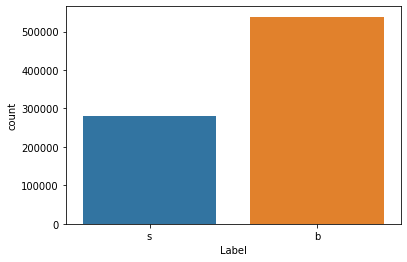

In [0]:
# very unbalanced dataset
sns.countplot(x='Label',data=higgs_atlas_data) 

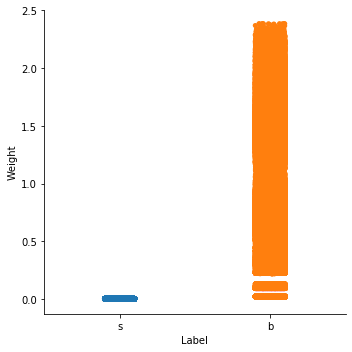

In [0]:
sns.catplot(y='Weight',x='Label',data=higgs_atlas_data)

In [0]:
#change the label variables to binary values
label = {'s': 1,'b': 0}  
higgs_atlas_data.Label  = [label[item] for item in higgs_atlas_data.Label] 
higgs_atlas_data.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.000814,1,t,0.002653
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,0.681042,0,t,2.233584
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,0.715742,0,t,2.347389
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,1.660654,0,t,5.446378
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.904263,0,t,6.245333


In [0]:
features=higgs_atlas_data.drop(columns='Label')
target=higgs_atlas_data['Label']
X_train,X_test, y_train, y_test = train_test_split(features,target, test_size = 0.2, stratify=target, random_state = 42)

In [0]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((654590, 34), (654590,), (163648, 34), (163648,))

In [0]:
X_train.drop(columns=['KaggleSet','KaggleWeight','Weight'],inplace=True)
X_test.drop(columns=['KaggleSet','KaggleWeight','Weight'],inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
# parameters for LightGBMClassifier
params = {
    'objective' :'binary',
    'learning_rate' : 0.02,
    'num_leaves' : 76,
    'feature_fraction': 0.64, 
    'bagging_fraction': 0.8, 
    'bagging_freq':1,
    'boosting_type' : 'gbdt',
    'metric': 'binary_logloss'
}

In [0]:
lgbm = lightgbm.LGBMClassifier(**params)

In [0]:
lgbm.fit(X_train,y_train)

LGBMClassifier(bagging_fraction=0.8, bagging_freq=1, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.64,
               importance_type='split', learning_rate=0.02, max_depth=-1,
               metric='binary_logloss', min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_leaves=76, objective='binary', random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [0]:
y_pred=lgbm.predict(X_test)

In [0]:
accuracy_score(y_test,y_pred)

0.8337162690653109

Text(0, 0.5, 'TPR')

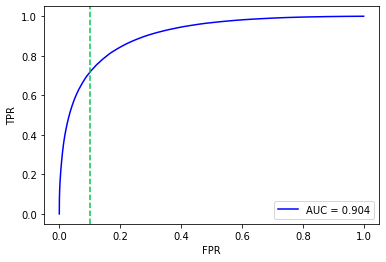

In [0]:
ytrain_pred_probas = lgbm.predict_proba(X_train)[:, 1]   # prob of predict as 1
fpr, tpr, thresholds = roc_curve(y_train, ytrain_pred_probas)   # precision_recall_curve
roc = pd.DataFrame({'FPR':fpr,'TPR':tpr,'Thresholds':thresholds})
_ = plt.figure()
roc_auc = auc(fpr,tpr)
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.axvline(0.1, color = '#00C851', linestyle = '--')
plt.xlabel("FPR")
plt.ylabel("TPR")

In [0]:
cm = confusion_matrix(y_test, y_pred)

In [0]:
cm

array([[98315,  9421],
       [17791, 38121]])

In [0]:
def ams(s, b):
    return math.sqrt(2 * ((s + b + 10) * math.log(1.0 + s/(b + 10)) - s))

In [0]:
def get_ams_score(W, Y, Y_pred):
    s = W * (Y == 1) * (Y_pred == 1)
    b = W * (Y == 0) * (Y_pred == 1)
    s = np.sum(s)
    b = np.sum(b)
    return ams(s, b)

In [0]:
def ams(s, b):
    bReg = 10.
    return math.sqrt(2 * ((s + b + bReg) * 
                          math.log(1 + s / (b + bReg)) - s))

In [0]:
x=np.where(fpr>0,tpr/fpr,0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


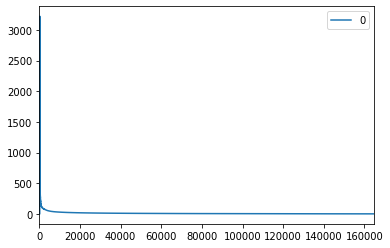

In [0]:
pd.DataFrame(x).plot()

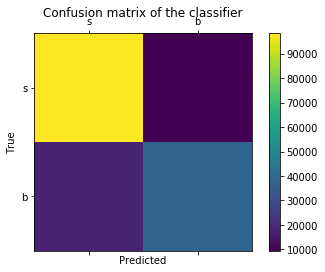

In [0]:

labels = ['s','b']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88    107736
           1       0.80      0.68      0.74     55912

    accuracy                           0.83    163648
   macro avg       0.82      0.80      0.81    163648
weighted avg       0.83      0.83      0.83    163648



In [0]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(lgbm)

# Calculate Shap values
shap_values = explainer.shap_values(X_test)

/usr/local/lib/python3.6/dist-packages/shap/explainers/tree.py:180: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


In [0]:
X_train.columns

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt'],
      dtype='object')

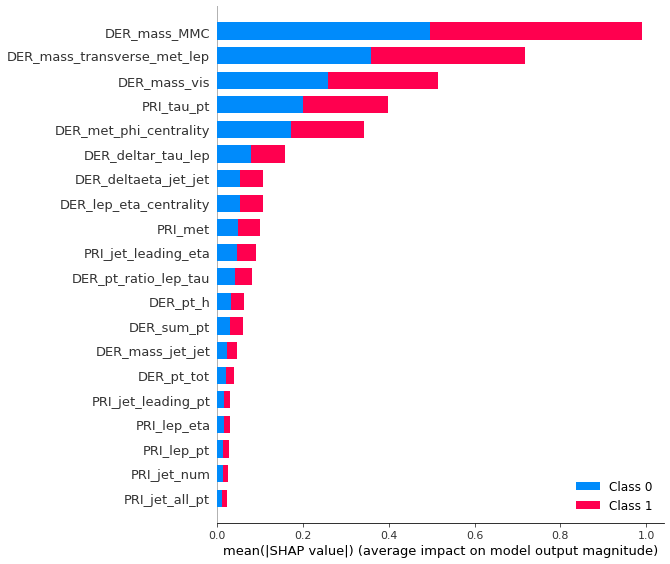

In [0]:
shap.summary_plot(shap_values,feature_names=X_test.columns)

In [0]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [0]:
X_train_res.shape

(861884, 31)

In [0]:
X_train.shape

(654590, 31)

In [0]:
lgbm.fit(X_train_res,y_train_res)

LGBMClassifier(bagging_fraction=0.8, bagging_freq=1, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.64,
               importance_type='split', learning_rate=0.02, max_depth=-1,
               metric='binary_logloss', min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_leaves=76, objective='binary', random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [0]:
y_pred_smote=lgbm.predict(X_test)

In [0]:
accuracy_score(y_test,y_pred_smote)

0.8225153989049667

In [0]:
seed = 7
kfold = model_selection.KFold(n_splits=5, random_state=seed)
# create the sub models
estimators = []
model1 = lightgbm.LGBMClassifier(**params)
estimators.append(('LightGBM', model1))
model2 = RandomForestClassifier()
estimators.append(('RandomForest', model2))
model3 = LinearSVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X_train, y_train, cv=kfold)
print(results.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in ver